https://twitter.com/octonion/status/1170272556219342848

In [6]:
using Plots
using Distributions
pyplot()

Plots.PyPlotBackend()

In [2]:
next = function(q)
    function(a)
        0.5 * (a + q/a)
    end
end

#3 (generic function with 1 method)

In [174]:
qua = function(q,x)
    sort(x)[max(1,Integer(round(q*n)))]
end

iqr = function(x)
    qua(0.75, x) - qua(0.25, x)
end

14.104923721969378

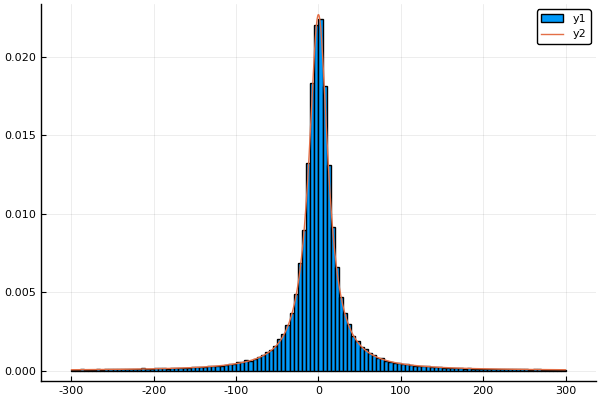

In [205]:
n = 100000
x = zeros(n)
x1 = rand()
q = -200
f = next(q)
x[1] = x1
for i in 2:n
    x[i] = f(x[i-1])
end
xtruncated = x[(x .< 300) .& (x .> -300)]
histogram(xtruncated, normalize=true, nbins=200)

t = -300:0.1:300
plot!(t,pdf.(Cauchy(0,iqr(x)/2),t))

In [188]:
println(sqrt(-q))
println(iqr(x)/2)

14.142135623730951
14.06569671623798


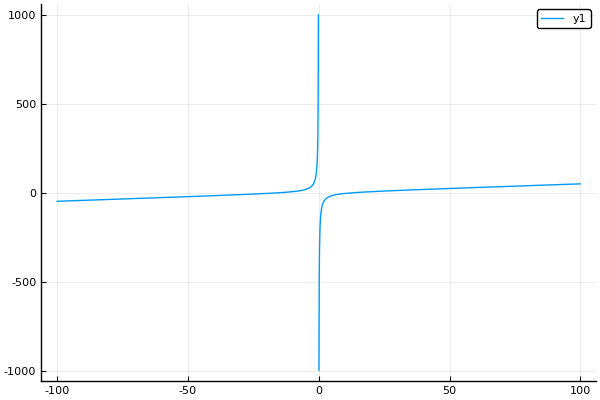

In [185]:
plot(t,f.(t))

$$ P(X < t) = \pi\arctan(x/\gamma) + 1/2 $$
Let $$ u(t) = \sqrt( t^2 - Q) $$
so the solutions to $(X + Q/X)/2 = t$ are
$$ x_1 = t - u(t) \quad x_2 = t + u(t) $$

After some _Kurvenanalyse_ we get

$$ P((X + Q/X)/2 < t) =  P(t - u(t)) + P(t + u(t)) - P(0) = $$
$$ = \frac{1}{\pi} \left( \arctan\left( \frac{t - u(t)}{\gamma} \right) + \arctan\left( \frac{t + u(t)}{\gamma} \right) \right) + 1/2$$

With $Q = -\gamma^2$ and using the identity $\arctan(a) + \arctan(b) = \arctan(\frac{a+b}{1-ab})$ we get

$$ = \frac{1}{\pi} \arctan(t/\gamma) + 1/2 = P(X < t) $$

CAVEAT: The arctan identity holds only for specific inputs $a$ and $b$.


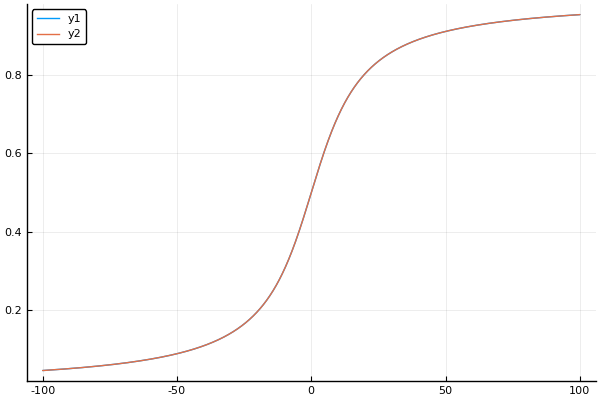

In [195]:
g = function(x)
    u = sqrt(x^2-q)
    v = sqrt(-q)
    (atan((x - u)/v) + atan((x+u)/v) - atan(0))/pi + 1/2
end
plot(t,g.(t))
plot!(t,atan.(t/sqrt(-q))/pi .+ 0.5)